In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# dataset
data = pd.read_csv('IMDB Dataset.csv')

data = data.sample(n=5000, random_state=42)  

data.dropna(inplace=True)
X = data['review']
y = data['sentiment']

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)  # Reduce features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [26]:
# Import classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_jobs=-1, n_estimators=50),  # Limit number of trees
    'K-Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
    'Logistic Regression': LogisticRegression(max_iter=50),  # Reduce number of iterations
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', n_estimators=50)  # Limit number of estimators
}

# Train, evaluate, and collect metrics for each model
model_metrics = {}

for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Collect accuracy, precision, recall, F1-score
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)

    # Store metrics
    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision (Positive)': report['Positive']['precision'],
        'Recall (Positive)': report['Positive']['recall'],
        'F1-Score (Positive)': report['Positive']['f1-score']
    }

# Display collected metrics in a DataFrame
metrics_df = pd.DataFrame(model_metrics).T
print(metrics_df)


Training Naive Bayes...

Training Random Forest...

Training K-Nearest Neighbors...

Training Logistic Regression...

Training Decision Tree...

Training XGBoost...
                     Accuracy  Precision (Positive)  Recall (Positive)  \
Naive Bayes          0.834000              0.826667           0.838972   
Random Forest        0.806000              0.819088           0.778078   
K-Nearest Neighbors  0.683333              0.711538           0.600812   
Logistic Regression  0.843333              0.816583           0.879567   
Decision Tree        0.684667              0.688920           0.656292   
XGBoost              0.811333              0.796104           0.829499   

                     F1-Score (Positive)  
Naive Bayes                     0.832774  
Random Forest                   0.798057  
K-Nearest Neighbors             0.651504  
Logistic Regression             0.846906  
Decision Tree                   0.672211  
XGBoost                         0.812459  


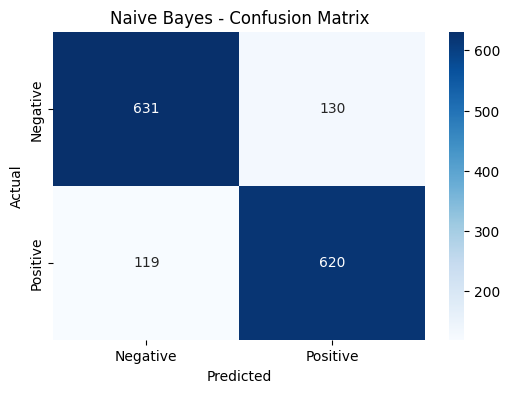

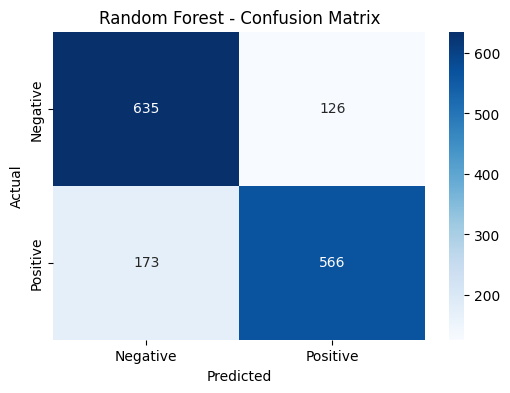

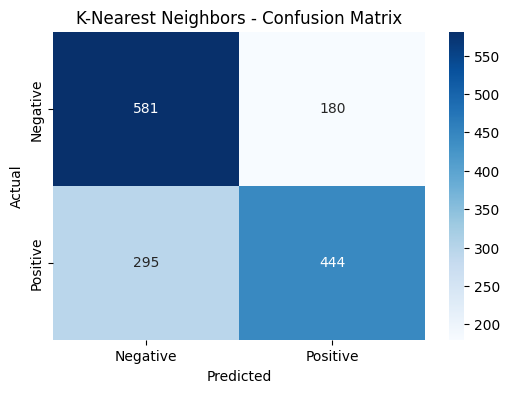

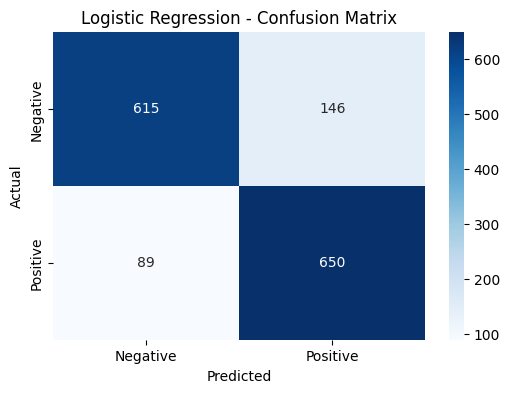

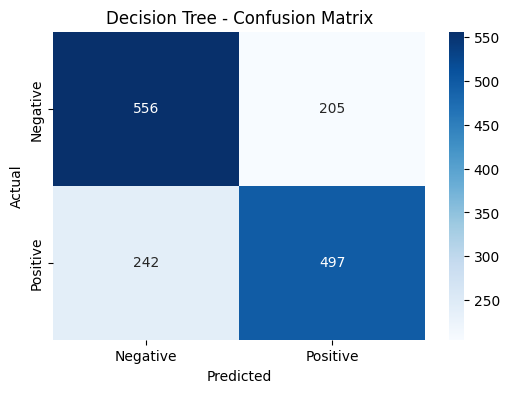

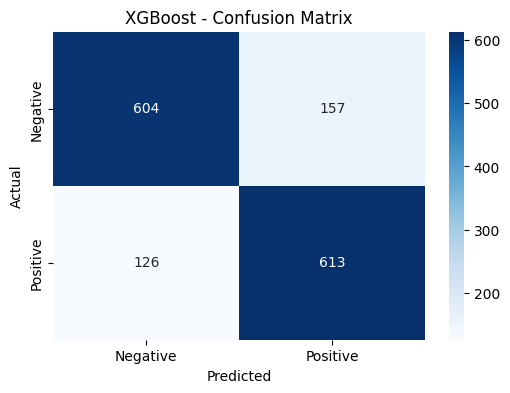

In [19]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_vec)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

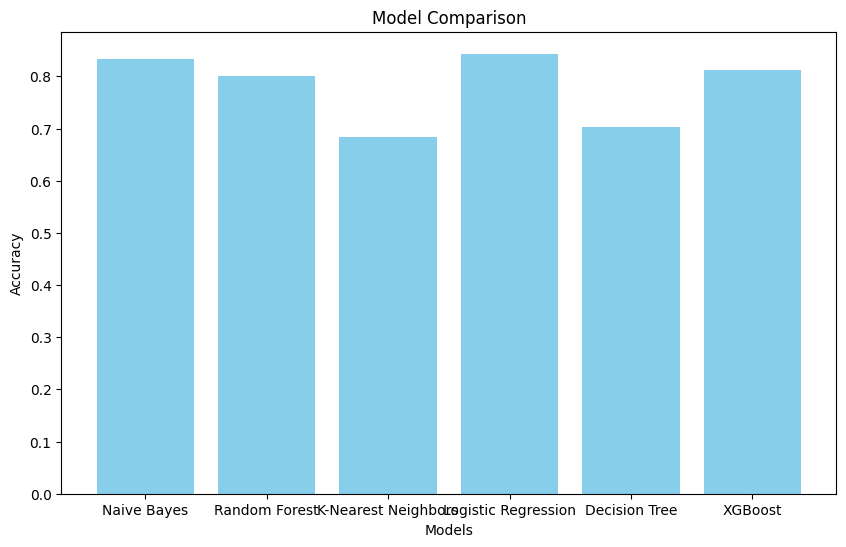

In [20]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_metrics.keys(), [metrics['Accuracy'] for metrics in model_metrics.values()], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

In [29]:
# Function to predict sentiment of a new review using all models
def predict_sentiment_all_models(review, models):
    review_vec = vectorizer.transform([review])  
    predictions = {}

    for name, model in models.items():
        prediction = model.predict(review_vec)
        sentiment = label_encoder.inverse_transform(prediction)
        predictions[name] = sentiment[0]

    return predictions

new_review = input("Enter a movie review: ")
all_predictions = predict_sentiment_all_models(new_review, models)

for model_name, prediction in all_predictions.items():
    print(f'{model_name} predicted sentiment: {prediction}')

Enter a movie review:  very bad


Naive Bayes predicted sentiment: negative
Random Forest predicted sentiment: negative
K-Nearest Neighbors predicted sentiment: negative
Logistic Regression predicted sentiment: negative
Decision Tree predicted sentiment: negative
XGBoost predicted sentiment: negative
